In [1]:
# # the imports in this cell are required when running on local device
# import os, sys
# sys.path.append(os.path.join('..', '..'))
# from utils.applyML_util import train_regression, eval_regression
# from utils.featureSelection_util import (pearson_correlation_fs, 
#                                          seleckKBest_fs, selectSequential_fs)

In [2]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_regression, eval_regression, showEvalutationGraph_regression
from featureSelection_util import (pearson_correlation_fs, 
                                   seleckKBest_fs, selectSequential_fs)

**LightGBM Regressor Documentation link:** https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor

In [4]:
# global random seed
RAND_SEED = 42

# initial model with only random seed and not any hyper-parametes
initial_model = LGBMRegressor(random_state=RAND_SEED)

# hyper-parameters

n_estimators = n_neighbors = [x*5 for x in range(1, 41)]

learning_rate = [0.001,0.01, 0.05, 0.1,]

# dictonary of all hyperparameters
param_grid = {'n_estimators':n_estimators,'learning_rate':learning_rate}

# variables needed for showEvalGraph_regression() function
MODEL_CLASS = LGBMRegressor
x_axis_param_name = 'n_estimators'
x_axis_vals = n_estimators

## 1. Experimentation on the Weather Daily dataset

In [5]:
# Load the train dataset
weather_daily_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_regression.csv')

# Load the test set
weather_daily_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_regression.csv')

In [6]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'learning_rate': 0.01, 'n_estimators': 200}
Train set performance: r2-score=0.2607, mae=6.345, rmse=12.852


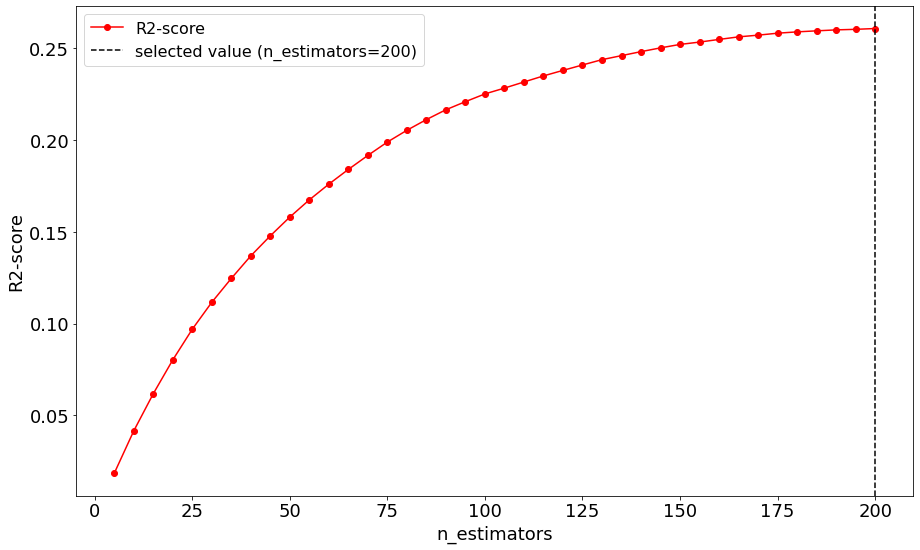

In [7]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [8]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1738, mae=6.6456, rmse=15.7167


### 1.1 Apply Pearson Feature Selection to Daily Weather Dataset

In [9]:
# select features from the train dataset
weather_daily_fs1_train_df, cols_to_drop = pearson_correlation_fs(weather_daily_train_df, 'Rainfall (mm)')

# keep only selected features on the test dataset
weather_daily_fs1_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

dropping Sunshine (hour/day) from (Cloudy (hour/day), Sunshine (hour/day))


In [10]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_fs1_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'learning_rate': 0.01, 'n_estimators': 200}
Train set performance: r2-score=0.2634, mae=6.3513, rmse=12.8274


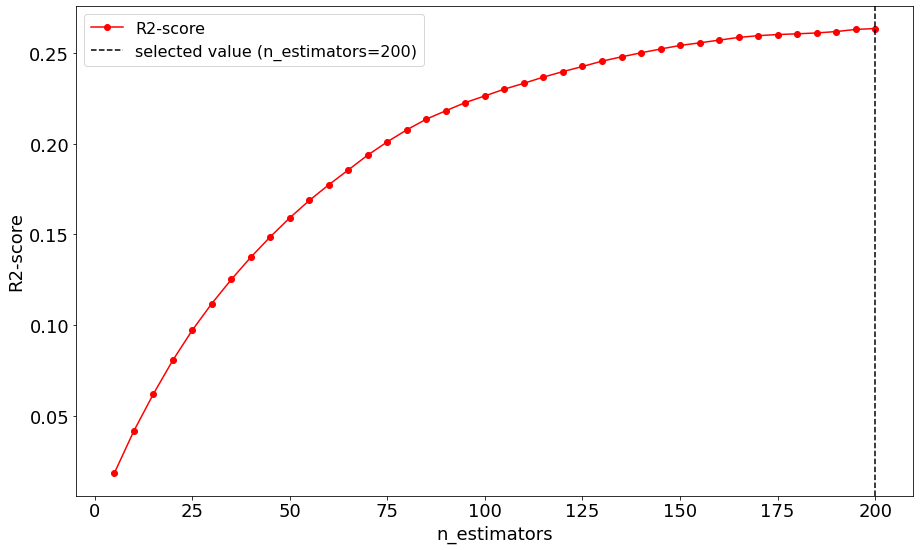

In [11]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_fs1_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [12]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs1_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1764, mae=6.6292, rmse=15.6924


### 1.2 Apply SelectKBest Feature Selection to Daily Weather Dataset

In [13]:
# select features from the train dataset
weather_daily_fs2_train_df, cols_to_drop = seleckKBest_fs(weather_daily_train_df, 'Rainfall (mm)', is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs2_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Max Temp. (degree Celcius)', 'Solar Radiation (cal/cm^2/day)']


In [14]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_fs2_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'learning_rate': 0.01, 'n_estimators': 200}
Train set performance: r2-score=0.2588, mae=6.3559, rmse=12.8627


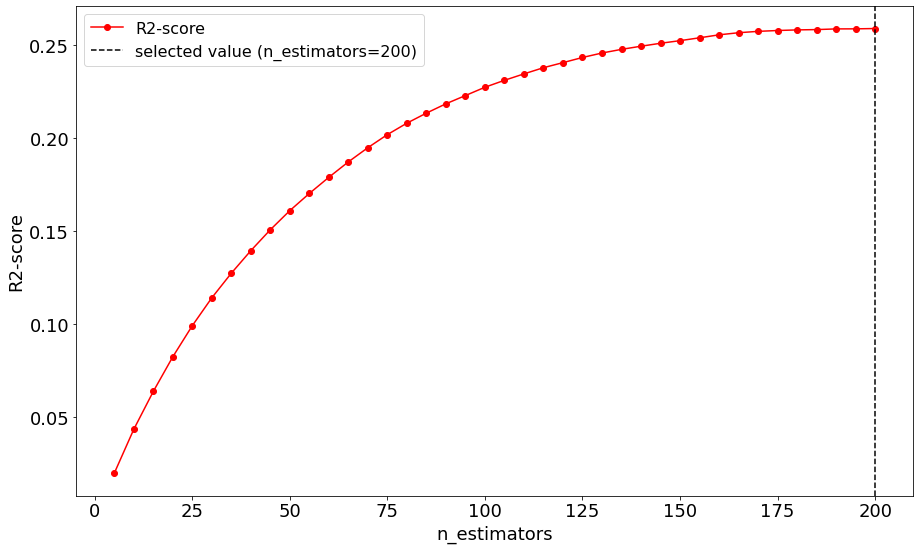

In [15]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_fs2_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [16]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs2_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1782, mae=6.616, rmse=15.6746


### 1.3 Apply SelectSequential Feature Selection to Daily Weather Dataset

In [17]:
# select features from the train dataset
weather_daily_fs3_train_df, cols_to_drop = selectSequential_fs(weather_daily_train_df, 'Rainfall (mm)', is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs3_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Actual Evaporation (mm)', 'Relative Humidity (morning, %)']


In [18]:
# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(initial_model, param_grid, weather_daily_fs3_train_df, cls='Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

Selected hyperparameters: {'learning_rate': 0.05, 'n_estimators': 40}
Train set performance: r2-score=0.2204, mae=6.4297, rmse=13.1766


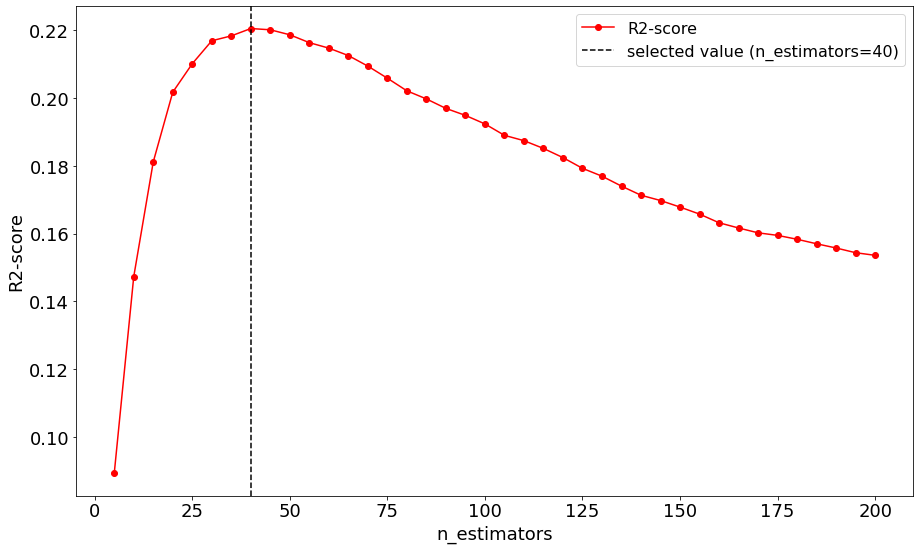

In [19]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
#selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_regression(MODEL_CLASS, weather_daily_fs3_train_df, cls='Rainfall (mm)', 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_vals, 
                                selected_model_params=selected_model_params)

In [20]:
# test model
test_r2, test_mae, test_rmse = eval_regression(model, weather_daily_fs3_test_df, cls='Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Test set performance: r2-score=0.1242, mae=6.955, rmse=16.1815
